In [ ]:
import time
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
df = pd.read_csv('/content/percobaan.csv')
df.head()

,nama,rating,waktu,label,review
0,Adi,5,1 minggu lalu,OR,Yang ini belum dicoba
1,Hilma,5,1 minggu lalu,OR,pesanan sesuai terima kasih
2,H***y,5,3 minggu lalu,OR,terima kasih atas bonusnya
3,I***d,5,1 bulan lalu,OR,terima kasih
4,S***f,5,1 bulan lalu,OR,"Respon seller cepat dan ramah, packing rapi, pengiriman cepat"


In [ ]:
df['length'] = df['review'].apply(len)

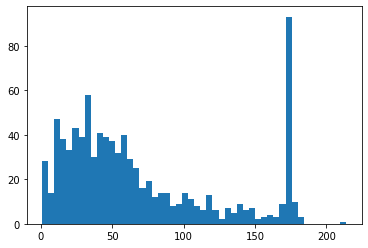

In [ ]:
plt.hist(df['length'],bins=50)
plt.show()

In [ ]:
df.groupby('label').describe()

length                                                     
       count       mean        std  min   25%   50%    75%    max
label                                                            
CG     699.0  76.653791  54.821333  1.0  34.0  58.0  114.5  214.0
OR     188.0  40.351064  36.303300  2.0  16.0  28.0   48.0  174.0

In [ ]:

df['review'] = df['review'].str.replace('\n', ' ')
df['review'] = df['review'].str.replace('cck', 'cocok ')
df['review'] = df['review'].str.replace('yg', 'yang ')
df['review'] = df['review'].str.replace('bkn', 'bukan ')
df['review'] = df['review'].str.replace('krn', 'karena ')
df['review'] = df['review'].str.replace('byk', 'banyak ')
df['review'] = df['review'].str.replace('smg', 'semoga ')
df['review'] = df['review'].str.replace('brg', 'barang ')
df['review'] = df['review'].str.replace('cpt', 'cepat ')
df['review'] = df['review'].str.replace('tq', 'terima kasih ')
df['review'] = df['review'].str.replace('sdh', 'sudah ')
df['review'] = df['review'].str.replace('dgn', 'dengan ')
df['review'] = df['review'].str.replace('klw', 'kalau ')
df['review'] = df['review'].str.replace('lg', 'lagi ')
df['review'] = df['review'].str.replace('pdhal', 'padahal ')
df['review'] = df['review'].str.replace('pdhl', 'padahal ')
df['review'] = df['review'].str.replace('blom', 'belum ')
df['review'] = df['review'].str.replace('belom', 'belum ')
df['review'] = df['review'].str.replace('blm', 'belum ')
df['review'] = df['review'].str.replace('smga', 'semoga ')
df['review'] = df['review'].str.replace('bgt', 'banget ')
df['review'] = df['review'].str.replace('dpt', 'dapat ')
df['review'] = df['review'].str.replace('dapet', 'dapat ')
df['review'] = df['review'].str.replace('pd', 'pada ')
df['review'] = df['review'].str.replace('trm', 'terima ')
df['review'] = df['review'].str.replace('moga', 'semoga ')
df['review'] = df['review'].str.replace('bgs', 'bagus ')
df['review'] = df['review'].str.replace('smoga', 'semoga ')
df['review'] = df['review'].str.replace('skrng', 'sekarang ')
df['review'] = df['review'].str.replace('ttp', 'tetap ')
df['review'] = df['review'].str.replace('kmrn', 'kemarin ')
df['review'] = df['review'].str.replace('terimakasih', 'terima kasih ')
df['review'] = df['review'].str.replace('klo', 'kalau ')
df['review'] = df['review'].str.replace('kalo', 'kalau ')
df['review'] = df['review'].str.replace('tp', 'tapi ')
df['review'] = df['review'].str.replace('stlh', 'setelah ')
df['review'] = df['review'].str.replace('sdah', 'sudah ')
df['review'] = df['review'].str.replace('kwalitas', 'kualitas ')
df['review'] = df['review'].str.replace('jd', 'jadi ')
df['review'] = df['review'].str.replace('org', 'orang ')
df['review'] = df['review'].str.replace('tyt', 'ternyata ')
df['review'] = df['review'].str.replace('cm', 'cuma ')
df['review'] = df['review'].str.replace('krg', 'kurang ')
df['review'] = df['review'].str.replace('utk', 'untuk ')
df['review'] = df['review'].str.replace('sy', 'saya ')
df['review'] = df['review'].str.replace('sblm', 'sebelum ')
df['review'] = df['review'].str.replace('sampe', 'sampai ')


In [ ]:
df['target'] = np.where(df['label']=='CG', 1, 0)

In [ ]:
df['target'].value_counts()

1    699
0    188
Name: target, dtype: int64

In [ ]:
def punctuation_to_features(df, column):
    """Identify punctuation within a column and convert to a text representation.
    
    Args:
        df (object): Pandas dataframe.
        column (string): Name of column containing text. 
        
    Returns:
        df[column]: Original column with punctuation converted to text, 
                    i.e. "Wow! > "Wow exclamation"
    
    """
    
    df[column] = df[column].replace('!', '')
    df[column] = df[column].replace('?', '')
    df[column] = df[column].replace('\'', '')
    df[column] = df[column].replace(',', '')
    


    
    return df[column]

In [ ]:
df['review'] = punctuation_to_features(df, 'review')

In [ ]:
nltk.download('punkt');

def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.
    
    Args:
        column: Pandas dataframe column (i.e. df['text']).
    
    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    
    """
    
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tokenized'] = df.apply(lambda x: tokenize(x['review']), axis=1)
df

,nama,rating,waktu,label,review,length,target,tokenized
0,Adi,5,1 minggu lalu,OR,Yang ini belum dicoba,21,0,"[Yang, ini, belum, dicoba]"
1,Hilma,5,1 minggu lalu,OR,pesanan sesuai terima kasih,27,0,"[pesanan, sesuai, terima, kasih]"
2,H***y,5,3 minggu lalu,OR,terima kasih atas bonusnya,26,0,"[terima, kasih, atas, bonusnya]"
3,I***d,5,1 bulan lalu,OR,terima kasih,12,0,"[terima, kasih]"
4,S***f,5,1 bulan lalu,OR,"Respon seller cepat dan ramah, packing rapi, pengiriman cepat",61,0,"[Respon, seller, cepat, dan, ramah, packing, rapi, pengiriman, cepat]"
...,...,...,...,...,...,...,...,...
882,THE,bintang 5,Lebih dari 1 tahun lalu,CG,"Packing rapi dan cepat sampai, sesemoga cocok biar jadi langganan",64,1,"[Packing, rapi, dan, cepat, sampai, sesemoga, cocok, biar, jadi, langganan]"
883,V***a,bintang 5,Lebih dari 1 tahun lalu,CG,Happy repeat order customer ðŸ˜„,32,1,"[Happy, repeat, order, customer]"
884,K***i,bintang 5,Lebih dari 1 tahun lalu,CG,Produknya bagus sekali! Reguler deh beli di sini,48,1,"[Produknya, bagus, sekali, Reguler, deh, beli, di, sini]"
885,Feby,bintang 5,Lebih dari 1 tahun lalu,CG,"Good Stuff, Recommended Seller!!",33,1,"[Good, Stuff, Recommended, Seller]"


In [ ]:
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(tokenized_column):
    """Return a list of tokens with English stopwords removed. 
    
    Args:
        column: Pandas dataframe column of tokenized data from tokenize()
    
    Returns:
        tokens (list): Tokenized list with stopwords removed.
    
    """
    stops = set(stopwords.words("indonesian"))
    return [word for word in tokenized_column if not word in stops]

In [ ]:
df['stopwords_removed'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
df.head()

,nama,rating,waktu,label,review,length,target,tokenized,stopwords_removed
0,Adi,5,1 minggu lalu,OR,Yang ini belum dicoba,21,0,"[Yang, ini, belum, dicoba]","[Yang, dicoba]"
1,Hilma,5,1 minggu lalu,OR,pesanan sesuai terima kasih,27,0,"[pesanan, sesuai, terima, kasih]","[pesanan, sesuai, terima, kasih]"
2,H***y,5,3 minggu lalu,OR,terima kasih atas bonusnya,26,0,"[terima, kasih, atas, bonusnya]","[terima, kasih, bonusnya]"
3,I***d,5,1 bulan lalu,OR,terima kasih,12,0,"[terima, kasih]","[terima, kasih]"
4,S***f,5,1 bulan lalu,OR,"Respon seller cepat dan ramah, packing rapi, pengiriman cepat",61,0,"[Respon, seller, cepat, dan, ramah, packing, rapi, pengiriman, cepat]","[Respon, seller, cepat, ramah, packing, rapi, pengiriman, cepat]"


In [ ]:
#def apply_stemming(tokenized_column):
#    """Return a list of tokens with Porter stemming applied.
    
#    Args:
#        column: Pandas dataframe column of tokenized data with stopwords removed.
    
#    Returns:
#        tokens (list): Tokenized list with words Porter stemmed.
    
#    """
    
#    stemmer = PorterStemmer() 
#    return [stemmer.stem(word).lower() for word in tokenized_column]

In [ ]:
#df['porter_stemmed'] = df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
#df

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 5.4 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def apply_stemming_id(tokenized_column):
    """Return a list of tokens with Porter stemming applied.
    
    Args:
        column: Pandas dataframe column of tokenized data with stopwords removed.
    
    Returns:
        tokens (list): Tokenized list with words Porter stemmed.
    
    """
    factory       = StemmerFactory()
    stemmer       = factory.create_stemmer()
    return [stemmer.stem(word).lower() for word in tokenized_column]

In [ ]:
df['porter_stemmed_id'] = df.apply(lambda x: apply_stemming_id(x['stopwords_removed']), axis=1)

df.head()

,nama,rating,waktu,label,review,length,target,tokenized,stopwords_removed,porter_stemmed_id
0,Adi,5,1 minggu lalu,OR,Yang ini belum dicoba,21,0,"[Yang, ini, belum, dicoba]","[Yang, dicoba]","[yang, coba]"
1,Hilma,5,1 minggu lalu,OR,pesanan sesuai terima kasih,27,0,"[pesanan, sesuai, terima, kasih]","[pesanan, sesuai, terima, kasih]","[pesan, sesuai, terima, kasih]"
2,H***y,5,3 minggu lalu,OR,terima kasih atas bonusnya,26,0,"[terima, kasih, atas, bonusnya]","[terima, kasih, bonusnya]","[terima, kasih, bonus]"
3,I***d,5,1 bulan lalu,OR,terima kasih,12,0,"[terima, kasih]","[terima, kasih]","[terima, kasih]"
4,S***f,5,1 bulan lalu,OR,"Respon seller cepat dan ramah, packing rapi, pengiriman cepat",61,0,"[Respon, seller, cepat, dan, ramah, packing, rapi, pengiriman, cepat]","[Respon, seller, cepat, ramah, packing, rapi, pengiriman, cepat]","[respon, seller, cepat, ramah, packing, rapi, kirim, cepat]"


In [ ]:
def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))

In [ ]:
df['all_text'] = df.apply(lambda x: rejoin_words(x['porter_stemmed_id']), axis=1)

In [ ]:
df[['all_text']]

,all_text
0,yang coba
1,pesan sesuai terima kasih
2,terima kasih bonus
3,terima kasih
4,respon seller cepat ramah packing rapi kirim cepat
...,...
882,packing rapi cepat moga cocok biar langgan
883,happy repeat order customer
884,produk bagus reguler deh beli
885,good stuff recommended seller


**VEKTORISASI**

In [ ]:
print(df["all_text"][280])

coba


In [ ]:
import math
from collections import Counter


# Contoh dokumen
documents = df['all_text']

# Menghitung jumlah dokumen
N = len(documents)

# Menghitung TF setiap kata dalam setiap dokumen
tf_scores = []
for doc in documents:
    tf_dict = {}
    word_counts = Counter(doc.split())
    for word, count in word_counts.items():
        tf_dict[word] = count / len(doc.split())
    tf_scores.append(tf_dict)

# Menghitung IDF setiap kata dalam seluruh dokumen
idf_scores = {}
for doc in documents:
    words = set(doc.split())
    for word in words:
        if word not in idf_scores:
            idf_scores[word] = 0
        idf_scores[word] += 1
for word in idf_scores:
    idf_scores[word] = math.log(N / idf_scores[word])

# Menghitung TF-IDF setiap kata dalam setiap dokumen
tfidf_scores = []
for tf in tf_scores:
    tfidf_dict = {}
    for word, score in tf.items():
        tfidf_dict[word] = score * idf_scores[word]
    tfidf_scores.append(tfidf_dict)

# Mencetak hasil perhitungan TF-IDF
for i, doc in enumerate(documents):
    print('Dokumen', i+1)
    for word, score in tfidf_scores[i].items():
        print(f'{word}: {score:.4f}')
    print()





Streaming output truncated to the last 5000 lines.
Dokumen 400
mantul: 0.7137
ni: 0.8707
bab: 0.3207
lancar: 0.3455
gak: 0.4989
bikin: 0.4291
mules: 0.5281

Dokumen 401
kirim: 0.4801
cepat: 0.4801
produk: 0.5638
original: 1.2946

Dokumen 402
alhamdulillah: 0.2598
barang: 0.1579
neng: 0.4063
banget: 0.3051
jual: 0.2636
ya: 0.3660
bantu: 0.2100
puas: 0.2353
poko: 0.4063
poduk: 0.4525
jga: 0.4525
bagus: 0.1774
k: 0.4063

Dokumen 403
alhamdulillah: 0.8661
moga: 0.1509
cocok: 0.1910
pakai: 0.3922
putih: 0.5754
hasil: 0.2993
mantap: 0.3880
jiwa: 0.7542

Dokumen 404
maaf: 0.2271
ngasih: 0.2770
komen: 0.3085
krn: 0.2770
kemarin: 0.1995
beli: 0.1071
slimming: 0.1539
tea: 0.1919
sling: 0.3085
capsul: 0.2455
tpi: 0.3085
konsul: 0.3085
dg: 0.2201
admin: 0.2455
nya: 0.2464
detox: 0.2586
minum: 0.1088
laxa: 0.3839
jadi: 0.2770
order: 0.1289

Dokumen 405
telah: 0.3699
coba: 0.1355
efek: 0.2083
lancar: 0.1727
bab: 0.4810
hari: 0.2674
kali: 0.2040
diet: 0.2250
konsumsi: 0.2578
herbilogy: 0.2250
jarang:

In [ ]:
# Menggabungkan semua TF-IDF ke dalam satu dictionary
merged_tfidf = {}
for tfidf in tfidf_scores:
    for word, score in tfidf.items():
        if word not in merged_tfidf:
            merged_tfidf[word] = score
        else:
            merged_tfidf[word] += score

# Menampilkan 10 kata dengan nilai TF-IDF tertinggi
top_k = 10
top_k_tfidf = dict(sorted(merged_tfidf.items(), key=lambda item: item[1], reverse=True)[:top_k])
for word, score in top_k_tfidf.items():
    print(f'{word}: {score:.4f}')

moga: 66.5731
cocok: 61.6153
coba: 53.2220
cepat: 45.6961
kirim: 44.2062
terima: 36.4358
puas: 35.7670
bagus: 35.5950
kasih: 34.9900
barang: 33.8229


In [ ]:
doc_corpus= df.loc[0:4, 'all_text']

vec=TfidfVectorizer(stop_words='english')
matrix=vec.fit_transform(doc_corpus)
print("Feature Names n",vec.get_feature_names_out())

print("Sparse Matrix n",matrix.shape,"n",matrix.toarray())
df.to_csv('au.csv')

Feature Names n ['bonus' 'cepat' 'coba' 'kasih' 'kirim' 'packing' 'pesan' 'ramah' 'rapi'
 'respon' 'seller' 'sesuai' 'terima' 'yang']
Sparse Matrix n (5, 14) n [[0.         0.         0.70710678 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.70710678]
 [0.         0.         0.         0.39346994 0.         0.
  0.58752141 0.         0.         0.         0.         0.58752141
  0.39346994 0.        ]
 [0.72604443 0.         0.         0.48624042 0.         0.
  0.         0.         0.         0.         0.         0.
  0.48624042 0.        ]
 [0.         0.         0.         0.70710678 0.         0.
  0.         0.         0.         0.         0.         0.
  0.70710678 0.        ]
 [0.         0.63245553 0.         0.         0.31622777 0.31622777
  0.         0.31622777 0.31622777 0.31622777 0.31622777 0.
  0.         0.        ]]


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Support Vector Machine**

Cross-validation scores: [0.80672269 0.8487395  0.86554622 0.88607595 0.8649789 ]
Average accuracy: 0.85
Accuracy Score: 0.8697478991596639
Confusion Matrix:
[[ 91  15]
 [ 16 116]]


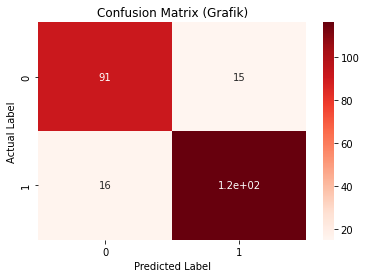

In [ ]:
# import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


# memisahkan data dan label
X = df['all_text']
y = df['target']

# konversi teks menjadi vektor tf-idf
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

# melakukan oversampling menggunakan SMOTE pada data
smote = SMOTE(sampling_strategy=0.7)
X_resampled, y_resampled = smote.fit_resample(X, y)

# membuat model SVM
svm = SVC(kernel='linear')

# melakukan cross-validation dengan 5-fold
scores = cross_val_score(svm, X_resampled, y_resampled, cv=5)

# menampilkan nilai akurasi rata-rata dari cross-validation
print("Cross-validation scores: {}".format(scores))
print("Average accuracy: {:.2f}".format(np.mean(scores)))

# membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


# melakukan training model pada data latih
svm.fit(X_train, y_train)

# melakukan prediksi pada data uji
y_pred = svm.predict(X_test)

# Hitung akurasi
acc_score = accuracy_score(y_test, y_pred)

# menghitung precision score, recall score, dan f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print hasil akurasi
print('Accuracy Score:', acc_score)
print('Confusion Matrix:')
print(conf_matrix)

# Tampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Grafik)')
plt.show()


In [ ]:
# Print hasil Confusion matrix
print("Precision score: ", precision)
print("Recall score: ", recall)
print("F1 score: ", f1)


Precision score:  0.8854961832061069
Recall score:  0.8787878787878788
F1 score:  0.8821292775665399


In [ ]:
sesudah = y_resampled.value_counts()
print(sesudah)

1    699
0    489
Name: target, dtype: int64


Sebelum SMOTE 
 1    699
0    188
Name: target, dtype: int64


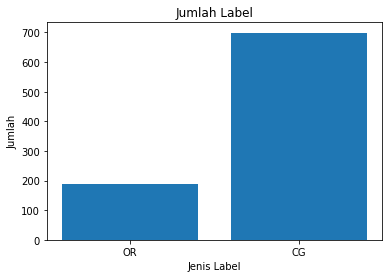



Sesudah SMOTE 
 1    699
0    489
Name: target, dtype: int64


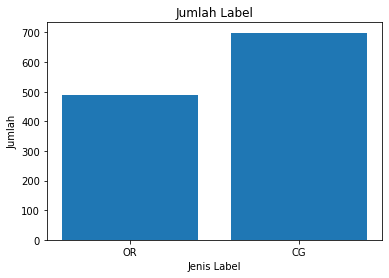

In [ ]:
# hitung nilai value_counts
sebelum_smote = y.value_counts()

# buat diagram batang
plt.bar(sebelum_smote.index, sebelum_smote.values)

# tambahkan label pada sumbu x dan y
plt.xticks([0, 1], ['OR', 'CG'])
plt.xlabel('Jenis Label')
plt.ylabel('Jumlah')
plt.title('Jumlah Label')

# tampilkan diagram
print("Sebelum SMOTE \n",sebelum_smote)
plt.show()

# hitung nilai value_counts
sesudah_smote = y_resampled.value_counts()

# buat diagram batang
plt.bar(sesudah_smote.index, sesudah_smote.values)

# tambahkan label pada sumbu x dan y
plt.xticks([0, 1], ['OR', 'CG'])
plt.xlabel('Jenis Label')
plt.ylabel('Jumlah')
plt.title('Jumlah Label')

# tampilkan diagram
print("\n")
print("Sesudah SMOTE \n",sesudah_smote)
plt.show()

**Naive Bayes**

Cross-validation scores: [0.70422535 0.70422535 0.75352113 0.75352113 0.82978723]
Mean accuracy: 0.7490560383578064
Standard deviation: 0.0459934361490776
Accuracy score: 0.848314606741573
Confusion matrix:
 [[ 37  13]
 [ 14 114]]


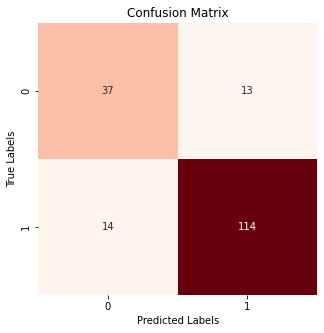

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73        50
           1       0.90      0.89      0.89       128

    accuracy                           0.85       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns

# memisahkan feature dan label
X = df['all_text']
y = df['target']

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transform text into TF-IDF features
vectorizer = TfidfVectorizer()

# balance data with SMOTE and train Naive Bayes model with cross-validation
model = make_pipeline(SMOTE(), MultinomialNB())
scores = cross_val_score(model, vectorizer.fit_transform(X_train), y_train, cv=5, scoring='accuracy')

# print mean and standard deviation of cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

# fit model on training set
model.fit(vectorizer.transform(X_train), y_train)

# evaluate performance on testing set
y_pred = model.predict(vectorizer.transform(X_test))

# menghitung precision, recall, dan f1 score

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# menampilkan precision, recall, dan f1 score

print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
# plot heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

print("Classification report:\n", classification_report(y_test, y_pred))


In [ ]:
# menampilkan precision, recall, dan f1 score
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.8976377952755905
Recall: 0.890625
F1 Score: 0.8941176470588235
